<a href="https://colab.research.google.com/github/Frosty-ID/Ball-Drop-Lab-PHYS-221/blob/master/Ball_Drop_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import make_interp_spline

In [3]:
def theory_time(sample_heights, res):
  for height in sample_heights:
    theory = math.sqrt((2 * height) / 9.81)
    res.append(theory)

  return res

In [4]:
def mean_val(sample_times, ans):
  for row in sample_times:
    total = 0
    for time in row:
      total += time

    mean = total / 5
    ans.append(mean)

  return ans

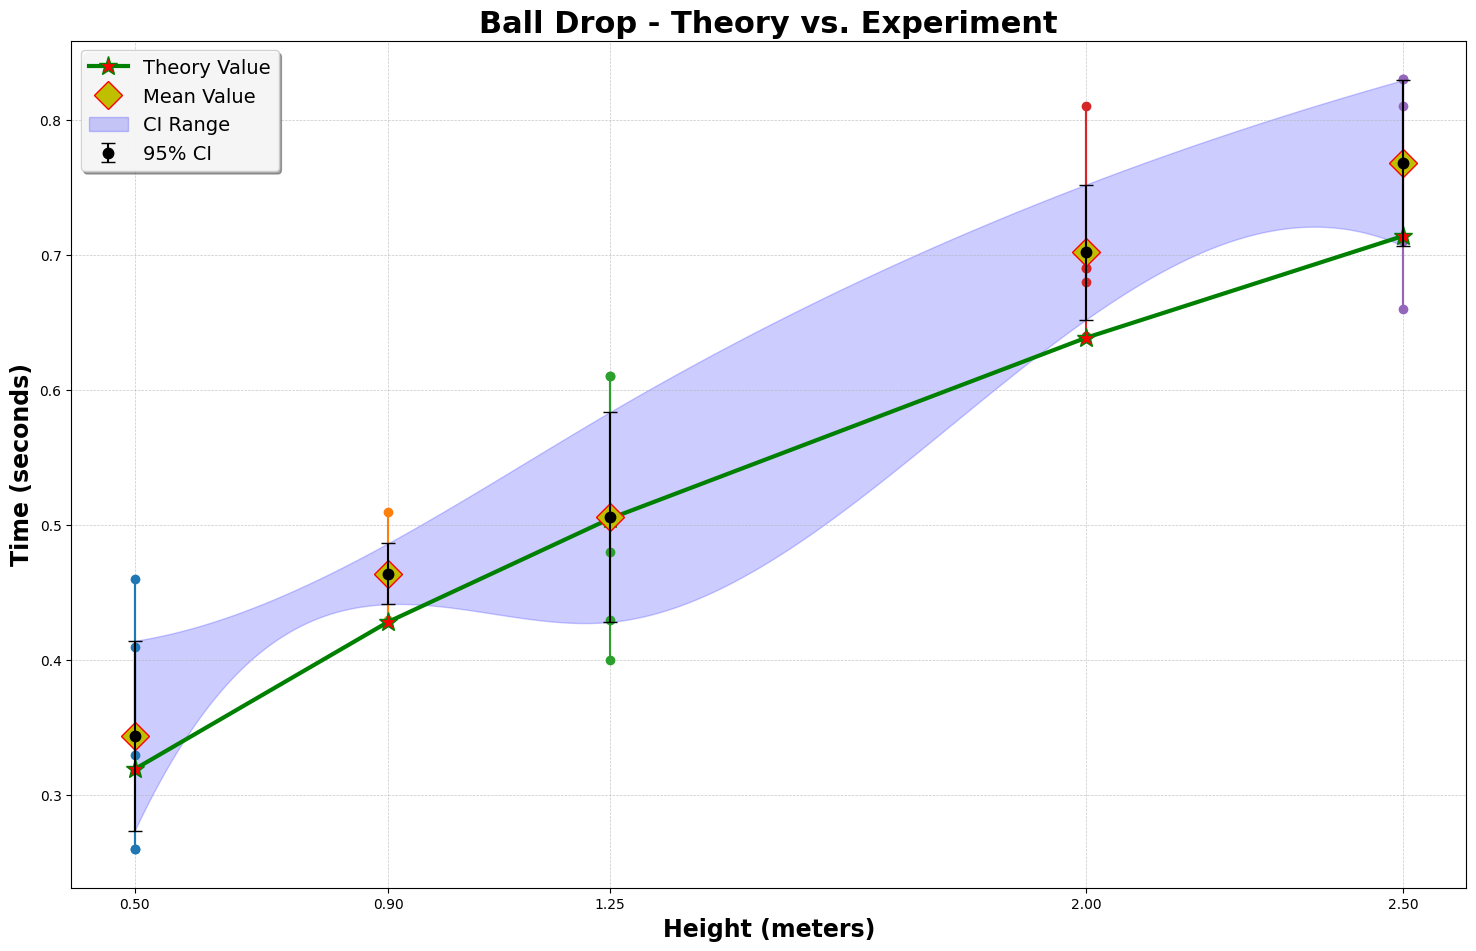

In [10]:
# Experimental Data
heights = np.array([
    [0.5, 0.5, 0.5, 0.5, 0.5],
    [0.9, 0.9, 0.9, 0.9, 0.9],
    [1.25, 1.25, 1.25, 1.25, 1.25],
    [2, 2, 2, 2, 2],
    [2.5, 2.5, 2.5, 2.5, 2.5]
])

times = np.array([
    [0.26, 0.41, 0.33, 0.46, 0.26],
    [0.46, 0.46, 0.46, 0.43, 0.51],
    [0.4, 0.48, 0.61, 0.61, 0.43],
    [0.64, 0.81, 0.69, 0.68, 0.69],
    [0.71, 0.83, 0.66, 0.83, 0.81]
])

# Theory Data
all_times = np.array([0.5, 0.9, 1.25, 2, 2.5])
theory_outputs = []
theory_outputs = theory_time(all_times, theory_outputs)


# Mean Value for Each Time
mean_vals = mean_val(times, [])

# 95% Confidence Interval
std_devs = np.std(times, axis=1)
n = times.shape[1]
ci = 1.96 * std_devs / np.sqrt(n)



# Smooth Curve

all_times_dense = np.linspace(all_times.min(), all_times.max(), 500)
spline_mean = make_interp_spline(all_times, mean_vals, k=3)
spline_ci = make_interp_spline(all_times, ci, k=3)
mean_vals_smooth = spline_mean(all_times_dense)
ci_smooth = spline_ci(all_times_dense)


# Plotting Data / Styling Graph
plt.figure(figsize=(18, 11))

for i in range(heights.shape[0]):
  plt.plot(heights[i], times[i], marker='o')

plt.plot(all_times, theory_outputs, marker='*', mfc='r', color='green', markersize=14, linewidth=3, label='Theory Value')
plt.plot(all_times, mean_vals, marker='D', mfc='y', color='red', markersize=14, linestyle='None', label='Mean Value')
plt.errorbar(all_times, mean_vals, yerr=ci, fmt='.', mfc='black', markersize=15, capsize=5, color='black', label='95% CI')
plt.fill_between(all_times_dense, mean_vals_smooth - ci_smooth, mean_vals_smooth + ci_smooth,
                 color='b', alpha=0.2, label='CI Range')
plt.title('Ball Drop - Theory vs. Experiment', fontsize=22, fontweight='bold')
plt.xlabel('Height (meters)', fontsize=17, fontweight='bold')
plt.ylabel('Time (seconds)', fontsize=17, fontweight='bold')
plt.xticks([0.5, 0.9, 1.25, 2, 2.5])
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left', fontsize=14, frameon=True, framealpha=0.9, fancybox=True, shadow=True)
plt.show()